### one-hot encoding version
- sigmoid() : y = wx+b 결과물 전달 => 반환 : 0.0~1.0 사이 값으로 변환 
- softmax() : y = wx+b 여러 개 전달 => 반환 : 여러 개의 결과값의 합이 1.0이 되도록 변환 

In [210]:
# 모듈 로딩 
import torch # torch 기본 모듈로 텐서 기본 함수들 
import torch.nn.functional as F # pytorch 인공 신경망 관련 함수들 

In [211]:
# output.max(dim=1)[1][0].item() # argmax는 값은 없고 인덱스만 있음

# 이미지 데이터 - 이진분류 모델
- 데이터셋 : fashion mnist
- 피쳐개수 : 28X28 784개
- 타겟 개수 : 0~9 티셔츠, 바지, 풀오버 ...

## 모듈 로딩 

In [212]:
from sklearn.datasets import fetch_openml
import pandas
import numpy as np

import torch
import torch.nn as nn # linear Regression 기능의 클래스 Linear
import torch.nn.functional as F # 손실함수를 위함
import torch.optim as optim # 최적화를 위함

## 데이터 준비

In [213]:

fashion_db = 'fashion-mnist'

fashion_data = fetch_openml(name = fashion_db, parser='auto')

In [214]:
### 데이터 확인 
feature = fashion_data['data']
target = fashion_data['target']

In [215]:
# 데이터 피쳐와 타겟 개수 확인 
print(f"feares: {feature.shape}, {feature.ndim}D")
print(f"target: {target.shape}, {target.ndim}D")

feares: (70000, 784), 2D
target: (70000,), 1D


In [216]:
# 분류 확인
print(f"feature => {fashion_data['feature_names']}")
print(f"target name => {fashion_data['target_names']}")
print(f"categories => {fashion_data['categories']}")
# 받아올 때 numpy로 받아오면 category로 고유값 확인 가능 
# dataframe은 카테고리 무조건 None뜸
print(f"categories => {target.unique()}")

feature => ['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7', 'pixel8', 'pixel9', 'pixel10', 'pixel11', 'pixel12', 'pixel13', 'pixel14', 'pixel15', 'pixel16', 'pixel17', 'pixel18', 'pixel19', 'pixel20', 'pixel21', 'pixel22', 'pixel23', 'pixel24', 'pixel25', 'pixel26', 'pixel27', 'pixel28', 'pixel29', 'pixel30', 'pixel31', 'pixel32', 'pixel33', 'pixel34', 'pixel35', 'pixel36', 'pixel37', 'pixel38', 'pixel39', 'pixel40', 'pixel41', 'pixel42', 'pixel43', 'pixel44', 'pixel45', 'pixel46', 'pixel47', 'pixel48', 'pixel49', 'pixel50', 'pixel51', 'pixel52', 'pixel53', 'pixel54', 'pixel55', 'pixel56', 'pixel57', 'pixel58', 'pixel59', 'pixel60', 'pixel61', 'pixel62', 'pixel63', 'pixel64', 'pixel65', 'pixel66', 'pixel67', 'pixel68', 'pixel69', 'pixel70', 'pixel71', 'pixel72', 'pixel73', 'pixel74', 'pixel75', 'pixel76', 'pixel77', 'pixel78', 'pixel79', 'pixel80', 'pixel81', 'pixel82', 'pixel83', 'pixel84', 'pixel85', 'pixel86', 'pixel87', 'pixel88', 'pixel89', 'pixel90', 'pixel9

## 2. 데이터 가공 및 전처리
- 결측치 없음
- 이상치 없음
- 중복값 없음 
- 다중 분류 => 다중 분류
- 이미지 크기 맞추기 : 여기서는 필요 없음 28, 28, 1(흑백)
- 정규화 : 피쳐 정규화 / 타겟 정규화

In [217]:
# 피쳐 : 784개 색상값 즉, 0~255 범위의 값
norm_feature = feature/255
norm_feature

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.003922,0.0,0.0,0.000000,0.000000,...,0.466667,0.447059,0.509804,0.298039,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.086275,...,0.000000,0.000000,0.003922,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.129412,0.376471,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.121569,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.105882,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


In [218]:
# [2-2] 정규화 : One-Hot 인코딩으로 변환
import pandas as pd
pd.get_dummies(target)

,0,1,2,3,4,5,6,7,8,9
0,False,False,False,False,False,False,False,False,False,True
1,True,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False
4,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...
69995,False,False,False,False,False,False,False,False,False,True
69996,False,True,False,False,False,False,False,False,False,False
69997,False,False,False,False,False,False,False,False,True,False
69998,False,True,False,False,False,False,False,False,False,False


In [219]:
# one-hot 2
from sklearn.preprocessing import OneHotEncoder

In [220]:
targetDF = target.to_frame()

In [221]:
# parse_output=False : ndarray 타입으로 반환
ohEncoder = OneHotEncoder(sparse_output=False)
norm_target = ohEncoder.fit_transform(targetDF) # one-hot encoder 안에는 꼭 2차원 
# 라벨 인코딩은 정수로 바꿔줌 
norm_target

array([[0., 0., 0., ..., 0., 0., 1.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [222]:
norm_target.shape, norm_target.ndim

((70000, 10), 2)

- 텐서화 시키기
- 데이터 셋 준비 : 훈련용 60000, 테스트용 10000
- 학습 방법 : 지도 학습 - 이진 분류 (softmax->but cross_entropy가 다 갖고 있음)
- 최적화 방법 : 경사하강법 기반의 방법 (Adam, SDG, )
- 손실함수 : 이진분류 손실 계산 함수(cross_entropy)

In [223]:
### 데이터셋 준비
limit = 60000

train = norm_feature.iloc[:limit]
test = norm_feature.iloc[limit:]

In [224]:
train_y = norm_target[:limit]
test_y = norm_target[limit:]

In [225]:
type(test_y)

numpy.ndarray

In [226]:
print(f"train: {train.shape}, {train.ndim}D")
print(f"train_y: {train_y.shape}, {train_y.ndim}D")


train: (60000, 784), 2D
train_y: (60000, 10), 2D


In [295]:
X_train = torch.FloatTensor(train.values) 
X_test = torch.FloatTensor(test.values)
y_train= torch.FloatTensor(train_y)
y_test = torch.FloatTensor(test_y)

In [296]:
print(f"X_train: {X_train.shape}, {X_train.ndim}D")
print(f"y_train: {y_train.shape}, {y_train.ndim}D")
print(f"X_test: {X_test.shape}, {X_test.ndim}D")
print(f"y_test: {y_test.shape}, {y_test.ndim}D")

X_train: torch.Size([60000, 784]), 2D
y_train: torch.Size([60000, 10]), 2D
X_test: torch.Size([10000, 784]), 2D
y_test: torch.Size([10000, 10]), 2D


In [297]:
# 학습 인스턴스 생성
in_, out_ = X_train.shape[1], y_train.shape[1] # 784, 1 -> 원핫 한 걸로 했으면 784, 2
model = nn.Linear(in_, out_) # 어제했던 required grad를 얘가 다 해줌 
model

Linear(in_features=784, out_features=10, bias=True)

위에 걸 보고 W를 만드는 것!! 

In [298]:
# # parameters는 generator니까 print하고 싶으면 반복문 써야함 
# for param in model.parameters():
#     print(param)

In [299]:
# 최적화 인스턴스 생성
optimizer = optim.Adam(model.parameters()) # model.parameters -> W1, W2, W3...와 bias가 담겨 있음 

In [239]:
# 학습 횟수 => 샘플 처음부터 끝까지 읽는 것 기준으로 횟수 지정
EPOCHS = 150

# 4 학습
- 반복 횟수 만큼 학습 진행 

In [245]:
loss_accuracy=[[], []]

for ep in range(EPOCHS):
    # 학습
    pre_y = model(X_train) # 여기서는 1인지 0인지가 나오는 것이 아니고 W0 + W1x1.. 이 계산의 결과가 나오는 것 
    print(f"예측값 pre_y => {pre_y.shape}")
    
    # 분류값 변환
    # pre_y2 = F.sigmoid(pre_y) 
    # print(f"분류값 pre_y2 => {pre_y2}")
    '''
    다중한다고 cross entropy를 사용하면 알아서 softmax 포함하고 있음 -> 그래서 해당 코드에서 분류값 변환 부분이 필요가 없는 것 
    binary는 그렇지가 않아서 sigmoid 따로 해주는 것 
    '''
    
    # 오차 cost function 계산
    loss = F.cross_entropy(pre_y, y_train)
    loss_accuracy[0].append(loss.item())
    #  loss_list.append(loss.item())
    print(f"[{ep}] Loss => {loss}")
    
    # W, b 업데이트
    optimizer.zero_grad() # 
    loss.backward() # 손실함수 계산 값으로 미분 진행 W, b 계산
    optimizer.step() # backward에서 계산 W, b 업데이트
    
    # 정확도 계산 => 예측값을 0과 1로 변환 => 정답과 비교 
    train_accuracy = (pre_y.argmax(dim=1)  == y_train.argmax(dim=1)).sum() / y_train.shape[0]
    loss_accuracy[1].append(train_accuracy.item())

예측값 pre_y => torch.Size([60000, 10])
[0] Loss => 0.49178993701934814
예측값 pre_y => torch.Size([60000, 10])
[1] Loss => 0.49123692512512207
예측값 pre_y => torch.Size([60000, 10])
[2] Loss => 0.4906885325908661
예측값 pre_y => torch.Size([60000, 10])
[3] Loss => 0.4901447594165802
예측값 pre_y => torch.Size([60000, 10])
[4] Loss => 0.48960554599761963
예측값 pre_y => torch.Size([60000, 10])
[5] Loss => 0.4890708327293396
예측값 pre_y => torch.Size([60000, 10])
[6] Loss => 0.4885404407978058
예측값 pre_y => torch.Size([60000, 10])
[7] Loss => 0.4880145192146301
예측값 pre_y => torch.Size([60000, 10])
[8] Loss => 0.4874928295612335
예측값 pre_y => torch.Size([60000, 10])
[9] Loss => 0.48697546124458313
예측값 pre_y => torch.Size([60000, 10])
[10] Loss => 0.48646223545074463
예측값 pre_y => torch.Size([60000, 10])
[11] Loss => 0.485953152179718
예측값 pre_y => torch.Size([60000, 10])
[12] Loss => 0.4854481518268585
예측값 pre_y => torch.Size([60000, 10])
[13] Loss => 0.48494723439216614
예측값 pre_y => torch.Size([60000, 10])
[1

In [246]:
y_train.argmax(dim=1) 

tensor([9, 0, 0,  ..., 3, 0, 5])

In [247]:
y_train.argmax(dim=1) 
# 이거 두 개가 같은지 봐야함 
pre_y.argmax(dim=1) 

tensor([9, 0, 0,  ..., 3, 0, 5])

# 손실과 정확도 시각화

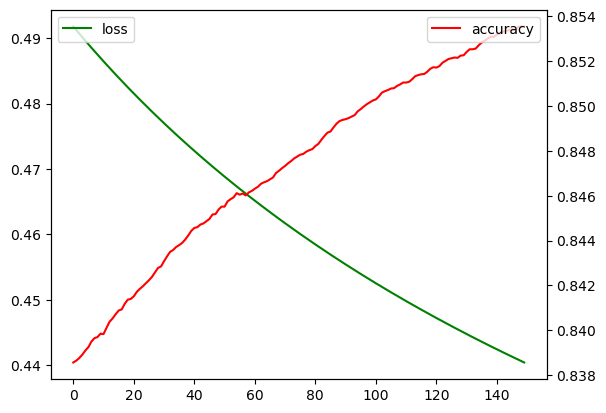

In [248]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(loss_accuracy[0], label='loss', color="g")

ax2 = ax1.twinx()
ax2.plot(loss_accuracy[1],label='accuracy', color='r')
# plt.plot(loss_accuracy[0], label='loss')
# plt.plot(loss_accuracy[1], label='accuracy')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xlabel("Epochs")
plt.show()

# 오늘 배운 거 
- Class로 모델 직접 만들기

In [313]:
# SoftMax 회귀 모델 클래스 생성
class MyModel(nn.Module):
    def __init__(self, in_, out_): # Layer 생성 
        super(MyModel, self).__init__() # 상속
        # nn.Sequential을 사용하여 레이어들을 조합
        self.layers = nn.Sequential( 
            nn.Linear(in_, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, out_)
        )
        
    def forward(self, x): # 순전파 학습 
        # nn.Sequential로 정의한 레이어들의 순전파 동작이 자동으로 수행 
        x = self.layers(x)
        return x # F.softmax(x, dim=1)

In [314]:
# 모델 인스턴스 생성 
model = MyModel(784, 10)
print(f"====== 모델 구조 확인 ======\n {model}")

====== 모델 구조 확인 ======
 MyModel(
  (layers): Sequential(
    (0): Linear(in_features=784, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=128, bias=True)
    (3): ReLU()
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): ReLU()
    (6): Linear(in_features=64, out_features=10, bias=True)
  )
)


In [315]:
# 모델 초기화
model = MyModel(784, 10)

# 최적화 함수 정의
optimizer = optim.Adam(model.parameters(), lr=0.01)


# 학습 수행
loss_accuracy = [[], []]
EPOCHS = 100

for ep in range(EPOCHS):
    # 학습
    pre_y = model(X_train)  # 모델로부터 예측값 계산
    
    # 오차 (손실) 계산
    loss = F.cross_entropy(pre_y, y_train)
    loss_accuracy[0].append(loss.item())
    
    # W, b 업데이트
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    # 정확도 계산
    train_accuracy = (pre_y.argmax(dim=1)  == y_train.argmax(dim=1)).sum() / y_train.shape[0]
    loss_accuracy[1].append(train_accuracy)

    print(f"[{ep+1}/{EPOCHS}] Loss: {loss.item():.4f}, Accuracy: {train_accuracy:.4f}")

[1/100] Loss: 2.3026, Accuracy: 0.0972
[2/100] Loss: 2.2315, Accuracy: 0.1533
[3/100] Loss: 2.0945, Accuracy: 0.1392
[4/100] Loss: 2.1400, Accuracy: 0.2616
[5/100] Loss: 1.6223, Accuracy: 0.4176
[6/100] Loss: 1.5114, Accuracy: 0.3943
[7/100] Loss: 1.3109, Accuracy: 0.4536
[8/100] Loss: 1.1604, Accuracy: 0.5077
[9/100] Loss: 1.0112, Accuracy: 0.6197
[10/100] Loss: 1.0329, Accuracy: 0.5783
[11/100] Loss: 0.9385, Accuracy: 0.5898
[12/100] Loss: 0.9049, Accuracy: 0.6046
[13/100] Loss: 0.9116, Accuracy: 0.6600
[14/100] Loss: 0.8585, Accuracy: 0.6377
[15/100] Loss: 0.8062, Accuracy: 0.7000
[16/100] Loss: 0.8131, Accuracy: 0.6804
[17/100] Loss: 0.7780, Accuracy: 0.6818
[18/100] Loss: 0.7288, Accuracy: 0.7261
[19/100] Loss: 0.7128, Accuracy: 0.7420
[20/100] Loss: 0.7027, Accuracy: 0.7306
[21/100] Loss: 0.6869, Accuracy: 0.7328
[22/100] Loss: 0.6568, Accuracy: 0.7584
[23/100] Loss: 0.6405, Accuracy: 0.7660
[24/100] Loss: 0.6238, Accuracy: 0.7701
[25/100] Loss: 0.6116, Accuracy: 0.7709
[26/100] 

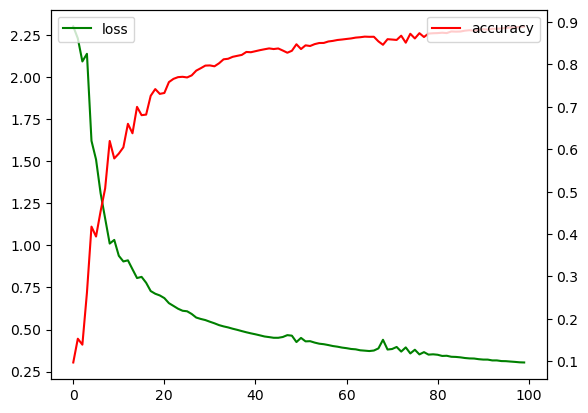

In [316]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()
ax1.plot(loss_accuracy[0], label='loss', color="g")

ax2 = ax1.twinx()
ax2.plot(loss_accuracy[1],label='accuracy', color='r')
# plt.plot(loss_accuracy[0], label='loss')
# plt.plot(loss_accuracy[1], label='accuracy')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.xlabel("Epochs")
plt.show()